<a href="https://colab.research.google.com/github/YBatyushkova/FOR_labs/blob/main/Lab_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technical intro

In [11]:
# When using Colab, make sure you run this instruction beforehand
!pip install --upgrade cffi==1.15.0
import importlib
import cffi
importlib.reload(cffi)
!pip install mip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# AMPL exercises

## Previous years exams

**1) 01.2019**

Write the definition in the AMPL modelling language of the following:

* a set $I$ of all the integers between 1 and 10.
* a positive variable $x_i$ with $i ∈ {I ∪ 0}$.
* a parameter $b_{i,j}$ with $i ∈ I$ and $j ∈ {I ∪ 0}$.

Then using the defined variables and parameters write in the AMPL modelling language the following **constraint**:

$$
\sum_{i \in I}\sum_{j \in I} b_{i,j}x_j \le \sum_{i \in I}b_{i,0}x_0
$$

In [44]:
import mip
import numpy as np

m1 = mip.Model()

I = [i for i in range(1,11)]

x = {i : m1.add_var() for i in ([0] + I)}
b = {(i,j) : np.random.randint(0, 10 + 1) for i in I for j in ([0] + I)}

#print([b[i,0] for i in I])

m1.add_constr(mip.xsum((mip.xsum(b[i,j]*x[j] for j in I)) for i in I) <= mip.xsum(b[i,0]*x[0] for i in I))

**2) 02.2019**

Write the definition in the AMPL modelling language of the following:
* a set $I$.
* a set $J$.
* a parameter $b_{i,j}$ with $i ∈ I$ and $j ∈ J$.
* an integer variable $x_{i,j}$ with $i ∈ I$ and $j ∈ J$.

Then write an **objective function** that maximizes the following quantity:


$$
\sum_{i \in I, j \in J |b_{i,j} > 0}x_{i,j}
$$

In [50]:
import mip
import numpy as np

m2 = mip.Model()

I = [i for i in range(10)]
J = [j for j in range(15)]
b = {(i,j) : np.random.randint(-10, 10) for i in I for j in J}

x = {(i,j) : m2.add_var(var_type = mip.INTEGER) for i in I for j in J}

m2.objective = mip.maximize(mip.xsum(x[i,j] for i in I for j in J if b[i,j]>0))

**3) 07.2019**

Write the definition in the AMPL modelling language of the following:
* a set $I$ of all the integers between 1 and 10.
* a set $J$ of all the integers between 7 and 30.
* a positive variable $x_{ij}$ with $i ∈ I$ and $j ∈ J$.
* a parameter $b_j$ with $j ∈ J$.

Then using the defined variables and parameters write in the AMPL modelling language the following **constraint**:

$$
\sum_{i \in I:i \le b_j}x_{ij} \le 5 \qquad \forall j \in J
$$

In [56]:
import mip
import numpy as np

m3 = mip.Model()

I = [i for i in range(1, 11)]
J = [j for j in range(7,31)]

x = {(i,j) : m3.add_var() for i in I for j in J}
b = {j : np.random.randint(0,30) for j in J}

for j in J:
  m3.add_constr(mip.xsum(x[i,j] for i in I if i <= b[j]) <= 5)

**4) 09.2019**

Write the definition in the AMPL modelling language of the following:
* a set $I$.
* a set $J$ of all the integers between 1 and 10.
* a positive variable $x_{ij}$ with $i ∈ I$ and $j ∈ I$.
* a parameter $b_j$ with $j ∈ J$.

Then using the defined variables and parameters write in the AMPL modelling language an **objective function** that maximizes the following quantity:

$$
max \sum_{i \in I}\sum_{j \in J:i \not = j} b_jx_{ij}
$$

In [57]:
import mip
import numpy as np

m4 = mip.Model()
I = [i for i in range(20)]
J = [j for j in range(1,11)]

x = {(i,j) : m4.add_var() for i in I for j in I}
b = {j : np.random.randint(10) for j in J}

m4.objective = mip.maximize(mip.xsum(mip.xsum(b[j]*x[i,j] for j in J if i != j) for i in I))

**5) 07.2021**

Write the definition in the AMPL modelling language of the following:
* two parameters $a$ and $b$.
* a set $I$ of all the integers between $a$ and $b$ (assume that $a < b$).
* a binary variable $x_{i,j}$ with $i, j ∈ I$.
* a parameter $b_i$ with $i ∈ I$.

Then using the defined variables and parameters write in the AMPL modelling language the following **constraint**:

$$
\sum_{j \in I:i \not = j} x_{i,j} \le 5 \qquad \forall i \in I, b_i > 1
$$

In [60]:
import mip
import numpy as np
m5 = mip.Model()
a = 3
b = 17

I = [i for i in range(a, 1 + b)]
x = {(i,j) : m5.add_var(var_type = mip.BINARY) for i in I for j in I}
b = {i : np.random.randint(10) for i in I}

for i in I:
  if b[i] > 1:
    m5.add_constr(mip.xsum(x[i,j] for j in I if i != j) <= 5)

## Example WeBeep (2021)

The director of a theater must organize the playbill for the upcoming season. A total of $m$ plays must be organized (described by the set $P = 1, . . . , m$). The theater offers several types of performances, described by the set $S$.

The shows are organized by $n$ companies (described by the set $C = 1, . . . , n$). Each company $i ∈ C$ specializes in a particular type of show $a_i$ and is willing to perform up to $l_i$ shows in the upcoming season.

To guarantee the variety of the season, the theater must have at least $k_j$ planned shows of each type in the playbill $j ∈ S$.

Some time-slots of the playbill ($L ⊂ P$ is the set of the plays that have to follow this criteria) are scheduled to occur very late at night. To respect the sleep of local residents, the director decided to not schedule any concert ($a_i$ = “concert”) in these slots.

For each company $i ∈ C$ we know the staging cost $c_i$ and the expected
revenue $r_i$ of the show. Write the linear programming model of the problem of
deciding which shows to put on the bill with the objective of maximizing the
balance between profits and costs.

In [7]:
import mip
import numpy as np

m = 8
P = [j for j in range(m)] # slots in the playbill
L = [3, 5, 7] # late time slots

n = 5
C = [i for i in range(n)] # companies

S = ["concert", "play", "opera"] # types of shows

a = {0 : "concert",
     1 : "opera",
     2 : "play",
     3 : "concert",
     4 : "opera"} # type of show of each company

l = {0 : 4,
     1 : 2,
     2 : 1,
     3 : 2,
     4 : 3} # number of shows each comp. can organize

c = {0 : 500,
     1 : 600,
     2 : 300,
     3 : 500,
     4 : 200} # staging cost of the show of each company

r = {0 : 1500,
     1 : 2000,
     2 : 1800,
     3 : 2300,
     4 : 1500} # revenue of the show of each company

k = {"concert" : 2,
     "play" : 1,
     "opera" : 4} # min number of shows of the particular type

m8 = mip.Model()

x = {(j,i) : m8.add_var(var_type = mip.BINARY) for j in P for i in C} # variable that indicates which company i org. the show in the slot j

for s in S:
  m8.add_constr(mip.xsum(x[j,i] for j in P for i in C if a[i] == s) >= k[s])

for i in C:
  m8.add_constr(mip.xsum(x[j,i] for j in P) <= l[i])

for j in L:
  for i in C:
    if a[i] == "concert":
      m8.add_constr(x[j,i] == 0)

for j in P:
  m8.add_constr(mip.xsum(x[j,i] for i in C) == 1)

m8.objective = mip.maximize(mip.xsum((r[i] - c[i])*x[j,i] for j in P for i in C))
m8.optimize()

print(m8.objective_value)

for j in P:
  for i in C:
    if x[j,i].x == 1:
      print(f'{j} - {a[i]} organized by {C[i]}')

11800.0
0 - concert organized by 3
1 - play organized by 2
2 - concert organized by 3
3 - opera organized by 4
4 - opera organized by 1
5 - opera organized by 4
6 - opera organized by 1
7 - opera organized by 4


## Website (2007)

**1)** A small cheese factory produces $m$ kinds of cheese. To produce one kg of cheese $j$, $L_{jI}$ litres of full cream milk and $L_{jS}$ litres of skimmed milk are needed, where $j=1,…,m$. The factory can produce at most $Q$ kg per day. For the next $n$ days, the demand of cheese $j$, with $j=1,…,m$, for each day $t=1,…,n$, is $d_{jt}$.

The maximum amount of available full cream and skimmed milk per day $t=1,…,n$ is $b_{It}$ and $b_{St}$, respectively.

Note that the milk available in day $t$ which is not used in day $t$ cannot be used in the successive days. The factory has a warehouse (empty at the beginning of the considered time horizon) whose capacity is $K$.

In the warehouse, the produced cheese can be stored to be sold afterwards. The factory must **meet the demand exactly**. For each cheese $j$, with $j=1,…,m$, a daily storing cost per kg is given, denoted by $c_j$. Formulate the problem of minimizing the storing cost, while satisfying the constraint on the available resources, on the production capacity and on the warehouse, and meeting the demand every day.

Formulate the problem as a Linear Programming problem.

**2)** The director of a sailing summer school received A applications for enrollment for the basic course and and applications for enrollment for the advanced course. The school has S skippers who can take both the basic and advanced courses, but who can only be assigned to one course at a time. The basic course takes place in a group: each skipper j..,S, can handle at most b persone people in its basic course.
Advanced courses, on the other hand, require each student to have a skipper who is dedicated only to him.
The school director must decide which applications to accept, which skippers to hire and how to assign pupils to skippers. The school must ensure that at least K questions for the advanced course are met. Knowing that enrollment in a basic course costs r, that in an advanced course costs c and that the salary of a skipper destined for a basic course is g, while it is l if the skipper is destined for an advanced course, write the model in linear programming of the problem of maximizing the difference between earnings and costs.

## Lab project (2021)

A company is planning on installing a series of unstaffed mini-markets in a rural area. This way, citizens that live far
from conventional stores may buy their groceries without needing the car. Specifically, the company wants to serve a set
of n houses whose coordinates in kilometers are described by parameters Cx and Cy. Some, but not all of the houses, gave
permission to the company to build a mini-marked on their property in exchange for a small compensation. Whether
or not it is possible to build a mini-market at house i is described by parameter usable[i]. All considered, the cost
of building a mini-market at house i is Dc[i]. The company wants to plan the construction of mini-markets so that
each house is at most range kilometers away (euclidean distance) from a mini-market and, the total construction cost is
minimized.

# Python exercises

## Lab project (2022)

### Biogas plant

You want to plan the two-year supply of raw materials for a biogas power plant. Such a plant produces energy by burning biogas, which is obtained from the bacterial fermentation of organic wastes. 
Specifically, your plant is powered by corn chopping, a residual of agro-industrial operations that you can purchase from 5 local farms. 
The table below shows the quarterly capacity of each farm for the next two years. Quantities are measured in tons.

Farm|T1|T2|T3|T4|T5|T6|T7|T8
:-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:
1|700|1500|700|0|0|700|1500|0
2|1350|0|450|0|1350|0|450|0
3|0|1500|1500|0|0|1500|1500|0
4|820|1560|820|0|820|1560|820|0
5|0|680|1080|0|0|680|1080|0

Due to crop rotations and corn harvesting periods, farms are unable to supply material in some quarters. Moreover the types of corn chopping provided are different, each coming with its own unitary purchase price, unitary storage cost and percentage of dry matter. The table below shows a summary of these information.

Farm|Purchase price|Storage cost|Dry matter
:-|:-:|:-:|:-:
1|0.20|0.002|15
2|0.18|0.012|28
3|0.19|0.007|35
4|0.21|0.011|37
5|0.23|0.015|42

Your biogas plant must operate by burning a mixture of corn choppings with a dry matter percentage between 20% and 40%. Under these conditions, the yield is 421.6 kWh of energy per ton of burned material. The energy produced by the plant is sold on the market at a price of 0.28 $/kWh. 

Due to state regulations, all biogas plants can produce a maximum of 1950 MWh of energy per quarter. You are allowed to store corn chopping in a silo, whose total capacity is of 500 tons. 

Plan the supply and inventory of your biogas plant with the goal of maximizing your profits (i.e., revenues minus costs).

## Exercises another group

### Diet problem

A canteen has to plan the composition of the meals that it provides. A meal can be composed of the types of food indicated in the following table. Costs, in Euro per hg, and availabilities, in hg, are also indicated.

Food|Cost|Availability
----|----|------------
Bread|0.1|4
Milk|0.5|3
Eggs|0.12|1
Meat|0.9|2
Cake|1.3|2

A meal must contain at least the following amount of each nutrient

Nutrient|Minimal quantity
--------|----------------
Calories|600 cal
Proteins|50 g
Calcium|0.7 g

Each hg of each type of food contains to following amount of nutrients

Food|Calories|Proteins|Calcium
----|--------|--------|-------
Bread|30 cal|5 g|0.02 g
Milk|50 cal|15 g|0.15 g
Eggs|150 cal|30 g|0.05 g
Meat|180 cal|90 g|0.08 g
Cake|400 cal|70 g|0.01 g

Give a linear programming formulation for the problem of finding a diet (a meal) of minimum total cost which satisfies the minimum nutrient requirements.

In [73]:
import mip
import numpy as np

F = ['Bread','Milk','Eggs','Meat','Cake'] # type of food
N = ['Calories','Proteins','Calcium'] # type of nutrient

c = {'Bread': 0.1,
     'Milk': 0.5,
     'Eggs': 0.12,
     'Meat': 0.9,
     'Cake': 1.3} #cost of food

a = {'Bread': 4,
     'Milk': 3,
     'Eggs': 1,
     'Meat': 2,
     'Cake': 2} # availability

q = {'Calories': 600,
     'Proteins': 50,
     'Calcium':0.7} # minimal quantity of each nutr. in the meal

b = {('Bread','Calories'): 30, ('Bread','Proteins'): 5, ('Bread','Calcium'): 0.02,
     ('Milk','Calories'): 50, ('Milk','Proteins'): 15, ('Milk','Calcium'): 0.15,
     ('Eggs','Calories'): 150, ('Eggs','Proteins'): 30, ('Eggs','Calcium'): 0.05,
     ('Meat','Calories'): 180, ('Meat','Proteins'): 90, ('Meat','Calcium'): 0.08,
     ('Cake','Calories'): 400, ('Cake','Proteins'): 70, ('Cake','Calcium'): 0.01} # amount of nutrient per food

m6 = mip.Model()
x = {f : m6.add_var() for f in F} 

for f in F:
  m6.add_constr(x[f] <= a[f])
  
for n in N:
  m6.add_constr(mip.xsum(x[f]*b[f,n] for f in F) >= q[n])

m6.objective = mip.minimize(mip.xsum(x[f]*c[f] for f in F))
m6.optimize()

for f in F:
  print(f'{f} - {x[f].x}')

#for i in m6.vars:
#  print(f'{i.name} - {i.x}')

Bread - 3.9999999999999996
Milk - 3.0
Eggs - 1.0
Meat - 1.5000000000000002
Cake - 0.0


### Oil blending problem

A refinery has to blend 4 types of oil to obtain 3 types of gasoline. The following table reports the available quantity of oil of each type (in barrels) and the respective unit cost (Euro per barrel)

Oil type|Cost|Availability
--------|----|------------
1|9|5000
2|7|2400
3|12|4000
4|6|1500


Blending constraints are to be taken into account, since each type of gasoline must contain at least a specific, predefined, quantity of each type of oil, as indicated in the next table. The unit revenue of each type of gasoline (Euro per barrel) is also indicated

Gasoline type|Requirements|Revenue
-------------|------------|-------
A|$\geq$ 20% of type 2| 12
A|$\leq$ 30% of type 3|12
B|$\geq$ 40% of type 3|18
C|$\leq$ 50% of type 2|10

Maximize the profit.

In [74]:
import mip
import numpy as np
m7 = mip.Model()

O = [o for o in range(1,5)] # set of oils
G = ['A', 'B', 'C'] # set of gasolines
x = {i : m7.add_var() for i in O} # amount of oil that we decide to blend
#y = {i : my.add_var() for i in G} 

c = {1 : 9, 2 : 7, 3 : 12, 4 : 6} # cost of each oil type per barrel
a = {1 : 5000, 2 : 2400, 3 : 4000, 4 : 1500} # availability of oils in barrels


r = {'A' : 12, 'B' : 18, 'C' : 10} # revenue of each tipe of gasoline

q_min = {('A',1) : 0, ('A',2) : 0.2, ('A',3) : 0, ('A',4) : 0,
         ('B',1) : 0, ('B',2) : 0, ('B',3) : 0.4, ('B',4) : 0,
         ('C',1) : 0, ('C',2) : 0, ('C',3) : 0, ('C',4) : 0}    # min quantity/percentage of oil

q_max = {('A',1) : 1, ('A',2) : 1, ('A',3) : 0.3, ('A',4) : 1,
         ('B',1) : 1, ('B',2) : 1, ('B',3) : 1, ('B',4) : 1,
         ('C',1) : 1, ('C',2) : 0.5, ('C',3) : 1, ('C',4) : 1}    # max quantity/percentage of oil

for i in O:
  m7.add_constr(x[i] <= a[i]) # availability of oil constraints



##  Labs 2022

### Cell phone

In [18]:
import mip

n_model = 2
n_component = 6

c = [110, 130]

A = [[1,2],
     [2,2],
     [1,3],
     [2,3],
     [1,0],
     [1,0]]

b = [10,18,12,21,9,10]

m12 = mip.Model()
x = [m12.add_var(var_type=mip.INTEGER) for i in range(n_model)]

for i in range(n_component):  
  m12.add_constr(mip.xsum(A[i][j]*x[j] for j in range(n_model)) <= b[i])

m12.objective = mip.maximize(mip.xsum(c[i]*x[i] for i  in range(n_model)))
m12.optimize()

print([x[i].x for i in range(n_model)])
print(m12.objective_value)

[8.0, 1.0]
1010.0


### SPT - Shortest Path Tree

Find the shortest path connecting two nodes on a randomly generated graph with $k$ nodes, where two nodes are connected if their Euclidean distance is not more than $d_{\max}$. Specifically:

1. Generate $k$ points by creating random $x,y$ coordinates for each; the coordinates should be in the interval $[0,100]$;
2. Create edges by joining all node pairs whose distance is at most $d_{\max}$;
3. Create the optimization model for the shortest path problem, i.e., flow-based, based on the created graph; assume the path is from node 0 to node 12;
4. Solve the optimization model and determine the shortest path.

$$
\begin{array}{lll}
   \min & \sum_{(i,j) \in A} d_{ij} f_{ij}\\
   \textrm{s.t.} & \sum_{j \in V: (i,j) \in A} f_{ij} -  \sum_{j \in V: (j,i) \in A} f_{ji} = b_i & \forall i\in V\\
  & f_{ij} \ge 0 & \forall (i,j) \in A
\end{array}
$$

where $b_i = \left\{
   \begin{array}{ll}
      1 & \textrm{if }i=s\\
     -1 & \textrm{if }i=t\\
      0 & \textrm{otherwise}
   \end{array}
   \right.$.

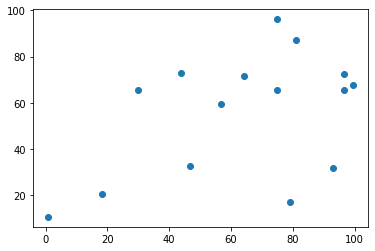

0 ---> 3
3 ---> 10
10 ---> 12


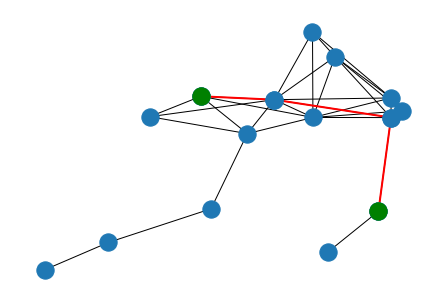

In [3]:
import numpy as np
import math
import mip
import matplotlib.pyplot as plot
import networkx as nx

k = 15    # number of points
grid_size = 100   # size of the grid of points
d_max = 0.35 * grid_size    # max distance between two nodes

s = 0   # starting point
t = 12    # termination point

np.random.seed(12345)    # RANDOM seed, to replicate (NUMPY)
point = grid_size * np.random.random((k,2))   # set of k random points with two coord., multiply them by the grid_size, since random numbers are below 0
V = [i for i in range(k)]    # set of nodes
distance = np.array([[math.sqrt(np.sum((point[i]-point[j])**2)) for i in V] for j in V] )    # matrix of distances
A = [(i,j) for i in V for j in V if (distance[i,j] <= d_max and i != j)]    # set of arcs, directed

plot.scatter(point[:, 0], point[:, 1])    # scatter plot just to show points as circles
plot.show()   # show the plot

m = mip.Model()   # create a model
f = {(i, j):m.add_var(var_type=mip.BINARY) for (i,j) in A}    #variables

b = {i : 0 for i in V}    # define b[i] for all i
b[s] = 1
b[t] = -1

for i in V:   # flow conservation constraint
  m.add_constr(mip.xsum(f[i,j] for j in V if (i,j) in A) - mip.xsum(f[j,i] for j in V if (j, i) in A) == b[i])

m.objective = mip.minimize(mip.xsum(distance[i,j]*f[i,j] for (i,j) in A))
m.optimize()

#print([f[i,j].x for (i,j) in A if f[i,j].x != 0])
for (i,j) in A:
  if f[i,j].x != 0:
    print(i, "--->", j) 

coord = {i:(point[i,0], point[i,1]) for i in V}    # dictionary coord that has nodes as keys and (x,y) coordinates of those nodes as values, we need it to draw a graph later

def draw_solution(V, A, f):   # function to draw the SPT
  g = nx.Graph()    # initialize the graph like the model (NETWORKX)
  g.add_nodes_from(V)   # add nodes to the graph
  g.add_edges_from(A)   # add arcs to the graph
  nx.draw(g, pos = coord)   # draw the graph with the coord of nodes

  # Reset the graph and add only the arcs that belong to the solution, 
  # i.e. those for which the optimal value of the variable f[i,j] is nonzero
  g.clear()
  g.add_edges_from([(i,j) for (i,j) in A if f[i,j].x > 0])
  nx.draw(g, pos=coord, width=2, edge_color='red')

  # finally, draw a graph consisting of the sole root node, highlighted in green
  g.clear()
  g.add_node(s)
  nx.draw(g, pos={s: coord[s]}, node_color='green')

  g.clear()
  g.add_node(t)
  nx.draw(g, pos={t: coord[t]}, node_color='green')

draw_solution (V, A, f)   # after defining the function, call it with the current data

### MST - Minimum Spanning Tree

A formulation of the MST problem uses *cut sets*: given a graph $G=(V,E)$ with $V$ the set of nodes and $E$ the set of edges, we create binary variables $x_{ij}$ for each $(i,j)\in E$ such that $x_{ij}$ is 1 if $(i,j)$ is in the solution, 0 otherwise. Then the formulation includes $cut set$ inequalities.

A *cut* $\delta(S)$ in a graph $G=(V,E)$ is a subset of edges generated by a subset of nodes $S\subset V$: an edge $(i,j)\in E$ is in $\delta(S)$ if exactly one among $i$ and $j$ is in $S$.


The formulation enforces the following condition:

__For any cut $\delta(S)$ containing the set of edges $(i,j)$ with $i$ in $S\subset V$ and $j$ in $V\setminus S$, there must be at least one edge of $\delta(S)$ in the solution.__

This implies that a formulation for the MST is 

$$
\begin{array}{lll}
  \min & \sum_{(i,j)\in E} c_{ij} x_{ij}\\
  \textrm{s.t.} & \sum_{(i,j)\in \mathcal \delta(S)} x_{ij} \ge 1 & \forall S\subset V:S\neq \emptyset\\
                & x_{ij} \in \{0,1\} & \forall (i,j)\in E
\end{array}
$$

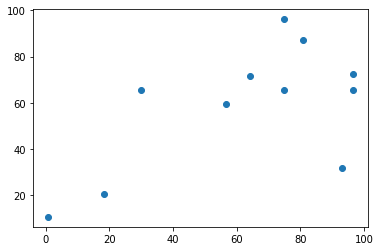

0 ---> 3
1 ---> 6
1 ---> 7
2 ---> 7
2 ---> 10
3 ---> 4
3 ---> 9
4 ---> 10
5 ---> 8
8 ---> 9
10 selected. [(0, 3), (1, 6), (1, 7), (2, 7), (2, 10), (3, 4), (3, 9), (4, 10), (5, 8), (8, 9)]


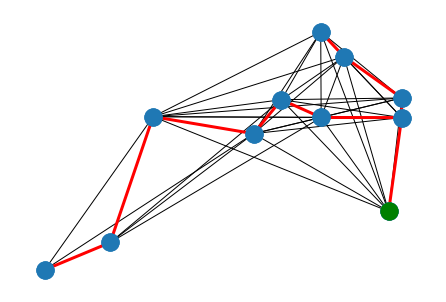

In [8]:
import numpy as np
import math

k = 11
grid_size = 100 # size of the grid of points

# distance beyond which we don't want edges
d_max = .75 * grid_size

np.random.seed(12345)

point = grid_size * np.random.random((k,2))   # Create k random points with two coordinates. Multiplying by grid_size yields random numbers between 0 and 100.
plot.scatter(point[:, 0], point[:, 1])    # scatter plot just to show points as circles
plot.show()   # show the plot


V = [i for i in range(k)] # Define the set of vertices of the graph as the list of numbers from 0 to k-1

distance = np.array([[math.sqrt(np.sum((point[i] - point[j])**2)) for i in V] for j in V])    # Determine the distance between each point

# Set of edges: note the condition that i<j (so we have pairs i,j but not j,i) and especially the condition that prevents long arcs.
E = [(i,j) for i in V for j in V if (distance[i,j] <= d_max and i<j)]

from itertools import chain, combinations
powerset = list(chain.from_iterable(combinations(V, r) for r in V))

import mip

m9 = mip.Model()
x = {(i,j):m9.add_var(var_type=mip.BINARY) for (i,j) in E}
m9.objective = mip.minimize(mip.xsum(distance[i,j]*x[i,j] for (i,j) in E))

for S in powerset:
  if len(S) > 0 and len(S) < k:
    m9.add_constr(mip.xsum(x[i,j] for (i,j) in E if ((i in S and j not in S) or (j in S and i not in S))) >= 1)

m9.optimize()

for (i,j) in E:
  if x[i,j].x > 0.001:    # !!!!!!!!!!!!!!! compare to zero
    print(f'{i} ---> {j}')

sol = [(i,j) for (i,j) in E if x[i,j].x > 0.001]
print(f'{len(sol)} selected. {sol}')

import networkx as nx

def draw_solution(V, A, x):
    g = nx.Graph()

    # Draw the whole graph first: all nodes, all arcs, no highlighting
    g.add_nodes_from(V)
    g.add_edges_from([(i,j) for (i,j) in A])
    nx.draw(g, pos=point)

    # Reset the graph and add only the arcs that belong to the solution, 
    # i.e. those for which the optimal value of the variable f[i,j] is nonzero
    g.clear()
    g.add_edges_from([(i,j) for (i,j) in A if x[i,j].x > 0.001])
    nx.draw(g, pos=point, width=3, edge_color='red')

    # finally, draw a graph consisting of the sole root node, highlighted in green
    g.clear()
    g.add_node(0)
    nx.draw(g, pos={0: point[0]}, node_color='green')
    
# after defining the function, call it with the current data
draw_solution (V, E, x)

### TSP - Traveling Salesman Problem

Find the shortest Hamiltonian circuit through $n$ nodes where the distance between any two nodes is known. In particular:

1. Generate $k$ points by creating random $x,y$ coordinates for each; the coordinates should be in the interval $[0,100]$;
2. Assume the graph $G = (V,A)$ on which to solve the TSP is _complete_, i.e. any two pairs are connected by an arc;
3. Create the optimization model for the TSP by only adding _flow conservation_ constraints, i.e., do not add any subtour elimination constraints;
4. Iteratively solve the optimization model and then add subtour elimination constraints until the solution is a single (optimal) tour.

$$
\begin{array}{lll}
   \min & \sum_{(i,j) \in E} d_{ij} x_{ij}\\
   \textrm{s.t.} & \sum_{j \in V: (i,j) \in E} x_{ij} = 2 & \forall i\in V\\
                 & \sum_{(i,j) \in E: i\in C, j\in C} x_{ij} \le |C| - 1 & \forall C\subset V: C \neq \emptyset\\
                 & x_{ij} \in \{0,1\} & \forall (i,j) \in E
\end{array}
$$

In the first version of our model, we won't include any subtour-elimination constraint but will only add the first set.

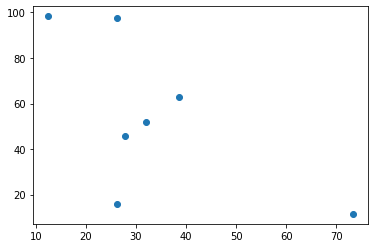

0 ---> 1
0 ---> 4
1 ---> 2
2 ---> 4
3 ---> 5
3 ---> 6
5 ---> 6
7 selected. [(0, 1), (0, 4), (1, 2), (2, 4), (3, 5), (3, 6), (5, 6)]


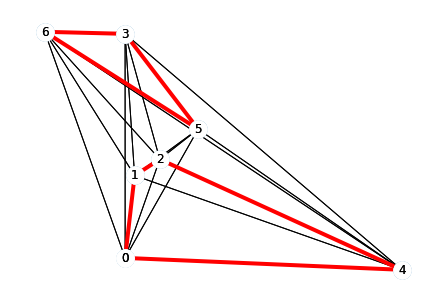

In [21]:
import numpy as np
import math

k = 7  # number of nodes

grid_size = 100 # size of the grid of points

# Create k random points with two coordinates. Multiplying by grid_size yields
# random numbers between 0 and 100.
np.random.seed(1337)
point = grid_size * np.random.random((k,2))

# Define the set of vertices of the graph as the list of numbers from 0 to k-1
V = [i for i in range(k)]

# Determine the distance between each point
distance = np.array([[math.sqrt(np.sum((point[i] - point[j])**2)) for i in V] for j in V])

import matplotlib.pyplot as plot
plot.scatter(point[:,0], point[:,1])
plot.show()

import networkx as nx

# Set of edges: note the condition that i<j as these are edges, undirected
E = [(i,j) for i in V for j in V if i < j]

# Define a dictionary whose keys are the nodes, and the values are tuples
# containing the (x,y) coordinates of each point
coord = {i: (point[i,0], point[i,1]) for i in V}

g = nx.Graph()

g.add_nodes_from(V)
g.add_edges_from(E)

nx.draw(g, pos=coord)

import mip

m10 = mip.Model()
x = {(i,j):m10.add_var(var_type=mip.BINARY) for (i,j) in E}
m10.objective = mip.minimize(mip.xsum(distance[i,j]*x[i,j] for (i,j) in E))

for i in V:
  m10.add_constr(mip.xsum(x[i,j] for j in V if i<j) + mip.xsum(x[j,i] for j in V if j<i) == 2)

m10.optimize()

for (i,j) in E:
  if x[i,j].x > 0.001:
    print(f'{i} ---> {j}')

sol = [(i,j) for (i,j) in E if x[i,j].x > 0.001]
print(f'{len(sol)} selected. {sol}')

def draw_solution(V, A, x):
    g = nx.Graph()

    # Draw the whole graph first: all nodes, all arcs, no highlighting
    g.add_nodes_from(V)
    g.add_edges_from([(i,j) for (i,j) in A])
    nx.draw(g, pos=coord, with_labels=True, node_color="white")

    # Reset the graph and add only the arcs that belong to the solution, 
    # i.e. those for which the optimal value of the variable x[i,j] is nonzero
    g.clear()
    g.add_edges_from([(i,j) for (i,j) in A if x[i,j].x > 0.5])
    nx.draw(g, pos=coord, width=4, edge_color='red', with_labels=True, node_color='white')

    # finally, draw a graph consisting of the sole root node, highlighted in green
    g.clear()
    g.add_node(0)
    nx.draw(g, pos={0: coord[0]}, node_color='white', with_labels=True)

    
# after defining the function, call it with the current data
draw_solution (V, E, x)

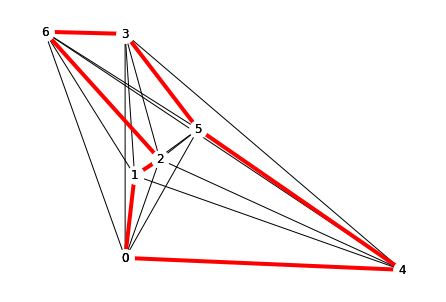

In [22]:
m10.add_constr(x[3,6] + x[3,5] + x[5,6] <= 2)
m10.optimize()
draw_solution (V, E, x)

### Product mix problem

A factory produces 4 types of perfume by mixing 5 ingredients. Denote as $P=\{1,2,3,4\}$ the set of perfumes, and as $I=\{1,2,3,4,5\}$ the set of ingredients. The retail price for each liter of perfume $p\in P$ is $c_p$, defined in the table below:

|Perfume | 1 | 2 | 3 | 4 |
|--------|---|---|---|---|
|Retail price  |300|255|260|390|

One liter of perfume $p$ requires a quantity $a_{ip}$ of the ingredient $i$, also expressed in liters, as specified below:

|Ingredient\Perfume|1|2|3|4|
|-|-|-|-|-|
|1|0.01|0.05|0.07|0.04|
|2|0.34|0.45|0.36|0.51|
|3|0.08|0.06|0.12|0.12|
|4|0.55|0.35|0.29|0.32|
|5|0.02|0.09|0.16|0.01|

There is a finite amount (in liters) of each ingredient expressed by $b_i$, for all $i\in I$ and defined in the following table:

|Ingredient|1|2|3|4|5|
|----------|-|-|-|-|-|
|Availability|30|400|90|450|70|

Determine the amount of perfume to produce for each type in order to maximize the total revenue.

In [32]:
import mip

c = [300, 255, 260, 390] # price of each perfume in eur per liter
b = [30, 400, 90, 450, 70] # availability of each ingredient in liters

A = \
[[0.01, 0.05, 0.07, 0.04],
 [0.34, 0.45, 0.36, 0.51],
 [0.08, 0.06, 0.12, 0.12],
 [0.55, 0.35, 0.29, 0.32],
 [0.02, 0.09, 0.16, 0.01]] # ingredient/perfume

n = len(c)
k = len(b)
"""
m17 = mip.Model()
x = {i : m17.add_var() for i in range(n)}

m17.objective = mip.maximize(mip.xsum(c[i]*x[i] for i in range(n)))

for j in range(k):
  m17.add_constr(mip.xsum(A[j][i]*x[i] for i in range(n)) <= b[j])
"""
def prod_mix(A,b,c):

  m17 = mip.Model()
  x = {i : m17.add_var() for i in range(n)}

  m17.objective = mip.maximize(mip.xsum(c[i]*x[i] for i in range(n)))

  for j in range(k):
    m17.add_constr(mip.xsum(A[j][i]*x[i] for i in range(n)) <= b[j])
  m17.optimize()

  return ([x[i].x for i in range(n)], m17.objective_value)

solution, revenue = prod_mix(A,b,c)

print(f'Total revenue = {revenue}')
print(solution)


Total revenue = 320809.2155369383
[573.115003808073, 89.74358974359002, 0.0, 323.0515359228229]


### Facility location

A region wants to build $p$ airports to serve a set $N = \{0,1,\ldots{},n-1\}$ of $n$ cities. There are $m>p$ candidate sites for the airports, each with an estimate cost $c_j$ to build an airport at location $j$ for $j\in M=\{0,1,...,m-1\}$.

Each airport can serve a subset of cities, and it is assumed that every city $i$ is served by __one__ airport $j$. The 20-year cost of maintaining the road between city $i$ and airport $j$, mostly proportional to the distance between $i$ and $j$, is denoted as $d_{ij}$. It is calculated as $400k$ euro per km.

Formulate the problem of _locating_ the $p$ airport sites as a discrete optimization problem.

The model contains:
* Sets: $N$ (set of cities), $M$ (set of candidate sites);
* Indices: $i$ for cities, $j$ for sites;
* Parameters: $c_j$ (cost of building airport at $j$), $d_{ij}$ (maintenance cost of road between city $i$ and airport $j$).

There are two classes of variables for this problem:

* binary variable $y_j$ for $j\in M$: it is 1 if an airport is built at candidate site $j$, 0 otherwise;
* binary variable $x_{ij}$ for $i \in N$, $j\in M$: 1 if city $i$ is associated with (i.e. served by) airport $j$.

The objective function, to be minimized, is the total (building + road maintenance) cost:

$$
\sum_{j \in M} c_j y_j + \sum_{i\in N} \sum_{j\in M} d_{ij} y_{ij}.
$$

The constraints are as follows:

* $p$ airports must be built: $\sum_{j\in M} y_j = p$;
* for each city $i$: city $i$ is served by one airport: $\sum_{j\in M} x_{ij} = 1 \forall i\in N$;
* the last class of constraints is tricky: if one or more cities $i\in N$ are served by airport $j$, then $y_j$ must be 1. This constraint is not explicit in the definition of the problem, but it is a result of our modeling choice with variables. We'll formulate it this way:

$$
\sum_{i\in N} x_{ij} \le ny_j.
$$

The meaning of the last set of constraints is obvious: if no airport is built at $j$, i.e., $y_j=0$, then all $x_{ij}$ on the left-hand side, i.e. all assignments from cities $i$ to airport $j$, will have to be zero. Viceversa, if any $x_{ij}$ is 1, then the sum on the left-hand side is positive and this forces $y_j$ to be 1.


Cost: 4686.53 M euro
Airports:
 14 -->   1.000; cities: 8 (1.00); 10 (1.00); 
 17 -->   1.000; cities: 1 (1.00); 3 (1.00); 4 (1.00); 5 (1.00); 6 (1.00); 7 (1.00); 
 29 -->   1.000; cities: 0 (1.00); 2 (1.00); 9 (1.00); 11 (1.00); 


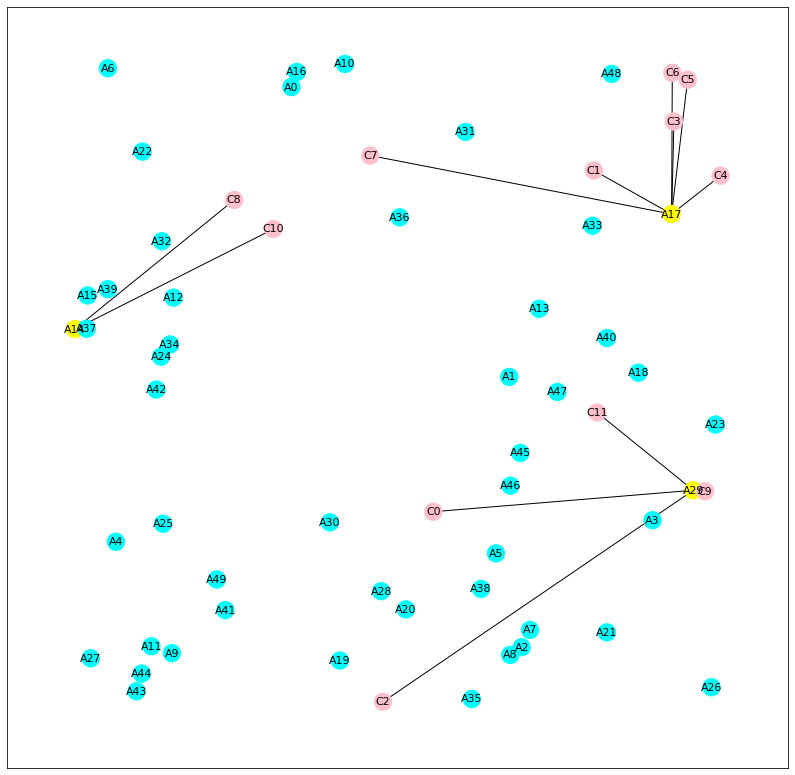

In [27]:
import mip
import numpy as np

ncities = 12  # cities
ncand = 50  # candidate sites for airports
p = 3   # number of airports to build

N = range(ncities) # cities
M = range(ncand) # candidate sites

# Airport building costs (in million euro)
build_cost = 1e3 + np.random.randint(2e3, size=ncand)

mcpk = .4  # Maintenance Cost (in million euro per km)

a_crd = 1000 * np.random.random((ncand,2))  # airport coordinates
c_crd  = 1000 * np.random.random((ncities,2))  # city coordinates

# Maintenance cost is a constant factor times the
# Euclidean distances between every city and every airport
maint_cost = {(i,j): mcpk * math.sqrt((c_crd[i,0] - a_crd[j,0])**2 + 
                                      (c_crd[i,1] - a_crd[j,1])**2)
             for i in N for j in M}

m14 = mip.Model()

x = {(i,j) : m14.add_var(var_type = mip.BINARY) for i in N for j in M}
y = {j : m14.add_var(var_type = mip.BINARY) for j in M}

m14.add_constr(mip.xsum(y[j] for j in M) == p)

for i in N:
  m14.add_constr(mip.xsum(x[i,j] for j in M) == 1)

for j in M:
  m14.add_constr(mip.xsum(x[i,j] for i in N) <= ncities*y[j])

m14.objective = mip.minimize(mip.xsum(build_cost[j]*y[j] for j in M) + mip.xsum(maint_cost[i,j]*x[i,j] for i in N for j in M))
m14.optimize()



def print_result(m,x,y):

    import networkx as nx
    import matplotlib.pyplot as plt
    
    print(f"Cost: {m.objective_value:.2f} M euro")

    print("Airports:")
    for j in M:
        if y[j].x > 0:
            print(f"{j:3d} --> {y[j].x:7.3f}; cities: ", end='')
            for i in N:
                if x[i,j].x > 0:
                    print(f"{i} ({x[i,j].x:.2f}); ", end='')
            print('')
    # Visualize solution on graph
    pos_a = {f'A{j}': (a_crd[j][0], a_crd[j][1]) for j in M}
    pos_c = {f'C{i}': (c_crd[i][0], c_crd[i][1]) for i in N}
    
    nodepos = {**pos_a, **pos_c}
    
    g = nx.Graph()
    g.add_nodes_from([f'A{j}' for j in M])
    g.add_nodes_from([f'C{i}' for i in N])
    edges = [(f'A{j}', f'C{i}') for j in M for i in N if x[i,j].x > 0] 
    g.add_edges_from(edges)
    color = ['yellow' if y[j].x > 0 else 'cyan' for j in M] + ['pink']*ncities
    plt.figure(1, figsize=(14,14))
    nx.draw_networkx(g, font_size=11, pos=nodepos, node_color=color)
    plt.show()
    
print_result(m14,x,y)

### Knapsack problem

In part I we saw how to add inequalities to tighten a formulation. We now look at another well-known problem in Optimization, the Knapsack problem. Given a set $N$ of $n$ objects, each with a value $v_i$ and a weight $p_i$, find the subset of $N$ that maximizes the total value while maintaining the total weight below a given limit $q$.

We can model the problem as follows:
$$
\begin{array}{lll}
\max & \sum_{i\in N} v_i x_i\\
\textrm{s.t.} & \sum_{i\in N} p_i x_i \le q\\
              & x_i \in \{0,1\} & \forall i\in N
\end{array}
$$

In [29]:
import mip
import numpy as np

np.random.seed(987654320)

n = 10  # number of items
N = range(n)
q = 210  # capacity of the knapsack
v = np.random.randint(100, size=n)  # value of each item
p = np.random.randint(100, size=n)  # weight of each item

m15 = mip.Model()

x = {i : m15.add_var(var_type=mip.BINARY) for i in N}

m15.add_constr(mip.xsum(p[i]*x[i] for i in N) <= q)
m15.objective = mip.maximize(mip.xsum(v[i]*x[i] for i in N))
m15.optimize()

print([i for i in N if x[i].x == 1])

[0, 5, 7, 8, 9]
